In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# To impute missing values
from sklearn.impute import KNNImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
data = pd.read_csv("/content/drive/MyDrive/Python Course/Model Tuning/Hands-on Quiz _ Model Tuning/Cardiac.csv")

In [4]:
df = data.copy()

In [5]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [7]:
df.shape

(889, 13)

In [8]:
df.describe(exclude=np.number)

,Gender,UnderRisk
count,889,889
unique,3,2
top,Male,no
freq,607,699


In [11]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.000,0.120,0.326,0.000,0.000,0.000,0.000,1.000
Consumes_other_tobacco_products,889.000,0.838,0.369,0.000,1.000,1.000,1.000,1.000
HighBP,889.000,0.087,0.281,0.000,0.000,0.000,0.000,1.000
Obese,889.000,0.919,0.273,0.000,1.000,1.000,1.000,1.000
Diabetes,889.000,0.055,0.228,0.000,0.000,0.000,0.000,1.000
Metabolic_syndrome,889.000,0.043,0.202,0.000,0.000,0.000,0.000,1.000
Use_of_stimulant_drugs,889.000,0.082,0.275,0.000,0.000,0.000,0.000,1.000
Family_history,889.000,0.926,0.262,0.000,1.000,1.000,1.000,1.000
History_of_preeclampsia,889.000,0.018,0.133,0.000,0.000,0.000,0.000,1.000
CABG_history,889.000,0.021,0.145,0.000,0.000,0.000,0.000,1.000


In [12]:
df.duplicated().sum()

789

In [13]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Gender                            0.000
Chain_smoker                      0.000
Consumes_other_tobacco_products   0.000
HighBP                            0.000
Obese                             0.000
Diabetes                          0.000
Metabolic_syndrome                0.000
Use_of_stimulant_drugs            0.000
Family_history                    0.000
History_of_preeclampsia           0.000
CABG_history                      0.000
Respiratory_illness               0.000
UnderRisk                         0.000
dtype: float64

In [14]:
df.UnderRisk.value_counts(1)

no    0.786
yes   0.214
Name: UnderRisk, dtype: float64

In [15]:
df['UnderRisk'] = df['UnderRisk'].replace({"yes": 1, "no": 0})

In [16]:
# Separating target variable and other variables
X = df.drop(columns="UnderRisk")

Y = df["UnderRisk"]

In [19]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(533, 12) (178, 12) (178, 12)


In [20]:
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [21]:
print("Train: ", X_train.shape)
print("Validation: ",X_val.shape)
print("Test: ",X_test.shape)

Train:  (533, 13)
Validation:  (178, 13)
Test:  (178, 13)


In [22]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [23]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [24]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [25]:
logistic_train = model_performance_classification_sklearn(lr, X_train, y_train)
print("Training performance:")
logistic_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.788,0.035,0.571,0.066


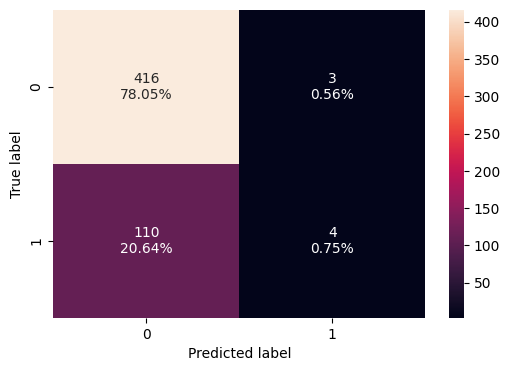

In [26]:
confusion_matrix_sklearn(lr, X_train, y_train)

In [27]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 114
Before UpSampling, counts of label 'No': 419 

After UpSampling, counts of label 'Yes': 419
After UpSampling, counts of label 'No': 419 

After UpSampling, the shape of train_X: (838, 13)
After UpSampling, the shape of train_y: (838,) 



In [28]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

In [29]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.674,0.776,0.645,0.704


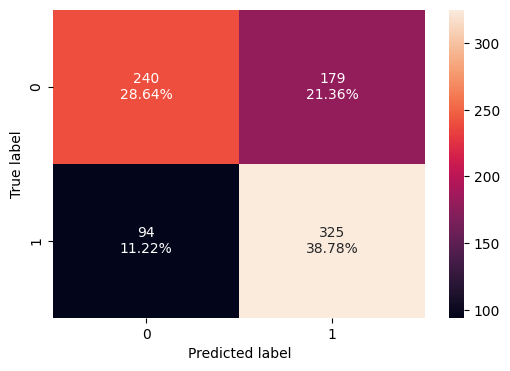

In [30]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_train_over, y_train_over)

In [32]:
Bag_reg_over = BaggingClassifier(random_state=1)

# Training the basic logistic regression model with training set
Bag_reg_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [33]:
# Calculating different metrics on train set
Bag_reg_over_val_perf = model_performance_classification_sklearn(
    Bag_reg_over, X_val, y_val
)
print("Validation performance:")
Bag_reg_over_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.573,0.605,0.274,0.377


In [34]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [35]:
rf_train = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance:")
rf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.801,0.175,0.625,0.274


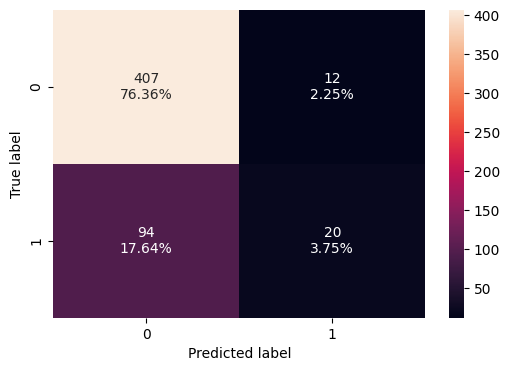

In [36]:
confusion_matrix_sklearn(rf, X_train, y_train)

In [40]:
%%time

scoring = "recall"

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on oversampled training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring = scoring,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))


Cross-Validation performance on oversampled training dataset:

Bagging: 0.7804073436603557
Random forest: 0.7780550774526678
Logistic: 0.7685312679288583
dtree: 0.775645438898451
CPU times: user 1.78 s, sys: 9.88 ms, total: 1.79 s
Wall time: 2.61 s


In [41]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {

    "n_estimators": np.arange(10, 110, 10),

    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],

    "base_estimator": [

        DecisionTreeClassifier(max_depth=1, random_state=1),

        DecisionTreeClassifier(max_depth=2, random_state=1),

        DecisionTreeClassifier(max_depth=3, random_state=1),

    ],

}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV

randomized_cv = RandomizedSearchCV(

    estimator=model,

    param_distributions=param_grid,

    n_jobs=-1,

    n_iter=50,

    scoring=scorer,

    cv=5,

    random_state=1,

)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9642857142857142:
CPU times: user 1.08 s, sys: 195 ms, total: 1.28 s
Wall time: 35.5 s


In [46]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.01,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [43]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [44]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 114
Before Under Sampling, counts of label 'No': 419 

After Under Sampling, counts of label 'Yes': 114
After Under Sampling, counts of label 'No': 114 

After Under Sampling, the shape of train_X: (228, 13)
After Under Sampling, the shape of train_y: (228,) 



In [45]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {

    "n_estimators": np.arange(10, 110, 10),

    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],

    "base_estimator": [

        DecisionTreeClassifier(max_depth=1, random_state=1),

        DecisionTreeClassifier(max_depth=2, random_state=1),

        DecisionTreeClassifier(max_depth=3, random_state=1),

    ],

}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV

randomized_cv = RandomizedSearchCV(

    estimator=model,

    param_distributions=param_grid,

    n_jobs=-1,

    n_iter=50,

    scoring=scorer,

    cv=5,

    random_state=1,

)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.8869565217391304:
CPU times: user 1.13 s, sys: 133 ms, total: 1.26 s
Wall time: 31.6 s


In [47]:
# Calculating different metrics on validation set
Adaboost_random_train_over = model_performance_classification_sklearn(adb_tuned1,X_train_over, y_train_over)
print("Training oversampling performance:")
Adaboost_random_train_over

Training oversampling performance:


,Accuracy,Recall,Precision,F1
0,0.615,0.995,0.565,0.721


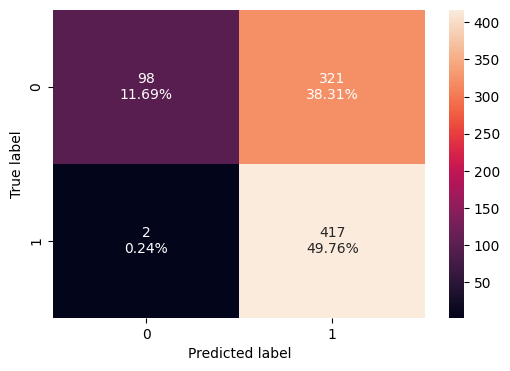

In [48]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_train_over, y_train_over)

In [49]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.01,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [50]:
# Calculating different metrics on validation set
Adaboost_random_train_un = model_performance_classification_sklearn(adb_tuned2,X_train_un, y_train_un)
print("Training Undersampling performance:")
Adaboost_random_train_un

Training Undersampling performance:


,Accuracy,Recall,Precision,F1
0,0.614,0.982,0.566,0.718


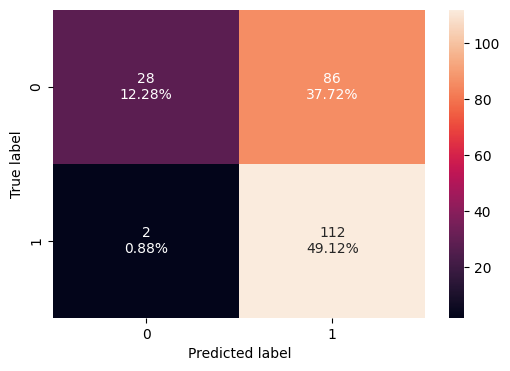

In [51]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_train_un, y_train_un)

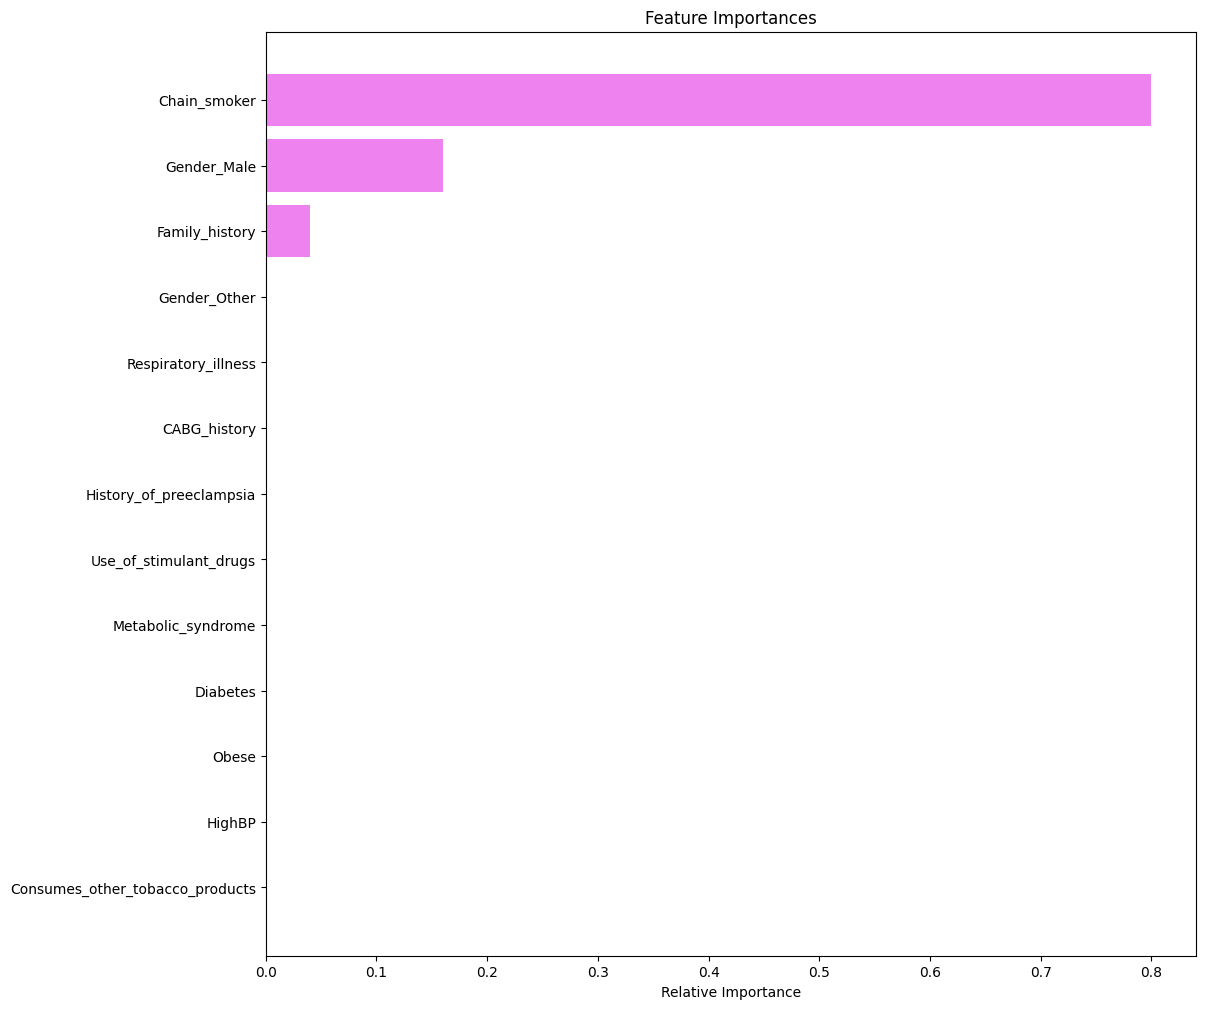

In [58]:
feature_names = X_train_un.columns
importances = adb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()